# San Francisco Rental Prices Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions that can be used for a Panel dashboard.

In [47]:
# imports
import plotly.express as px
import panel as pn
import pandas as pd

import os
from pathlib import Path
from dotenv import load_dotenv

import matplotlib.pyplot as plt
pn.extension('plotly')
import hvplot.pandas



In [48]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")
px.set_mapbox_access_token(map_box_api)

# Import Data

In [49]:
# Import the necessary CSVs to Pandas DataFrames
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_panel = pd.read_csv(file_path, index_col="year")
sfo_panel.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

In [54]:
# Define Panel Visualization Functions
def housing_units_per_year(sfo_panel):
    """Housing Units Per Year."""
    
    # YOUR CODE HERE!
    housing_units_mean = sfo_panel['housing_units'].groupby('year').mean()
    min_h = housing_units_mean.min()
    max_h = housing_units_mean.max()
    std_h = housing_units_mean.std()
    
    figure1 = plt.figure()
    plot_housing_units = housing_units_mean.plot.bar()

    plot_housing_units.set_xlabel('Year')
    plot_housing_units.set_ylabel('Housing Units')
    plot_housing_units.set_title('Housing Units in San Francisco from 2010 to 2016')
    plot_housing_units.set_ylim( min_h - 2*std_h , max_h + 2*std_h)
  

    return plot_housing_units
 

def average_gross_rent(sfo_panel):
    """Average Gross Rent in San Francisco Per Year."""
    
    # YOUR CODE HERE!
    avg_sale_price = sfo_panel[['gross_rent']].groupby('year').mean()
  

    figure3 = plt.figure()
    plot_gross_rent  = avg_sale_price['gross_rent'].plot(color='red')

    plot_gross_rent.set_xlabel('Year')
    plot_gross_rent.set_ylabel('Gross Rent by Year')
    plot_gross_rent.set_title('Average Gross Rent by Year')
   
    return plot_gross_rent
    
def average_sales_price():
    """Average Sales Price Per Year."""
    
    # YOUR CODE HERE!
    sales_price_by_neighborhood = sfo_panel.groupby(['year','neighborhood']).mean()
    hplot_sales_price_by_neighborhood = sales_price_by_neighborhood.hvplot(x='year', y='sale_price_sqr_foot', rot=90, legend='bottom_right', width=400, groupby='neighborhood', hover_cols='all')
    return hplot_sales_price_by_neighborhood


def average_price_by_neighborhood(sfo_panel):
    """Average Prices by Neighborhood."""
    
    # YOUR CODE HERE!
    sales_price_by_neighborhood = sfo_panel.groupby(['year','neighborhood']).mean()
    hplot_sales_price_by_neighborhood = sales_price_by_neighborhood.hvplot(x='year', y='sale_price_sqr_foot', rot=90, legend='bottom_right', width=400, groupby='neighborhood', hover_cols='all')
    return hplot_sales_price_by_neighborhood

def top_most_expensive_neighborhoods():
    """Top 10 Most Expensive Neighborhoods."""

    # YOUR CODE HERE!


def most_expensive_neighborhoods_rent_sales():
    """Comparison of Rent and Sales Prices of Most Expensive Neighborhoods."""   
    
    # YOUR CODE HERE!

    
    
def parallel_coordinates():
    """Parallel Coordinates Plot."""

    # YOUR CODE HERE!



def parallel_categories():
    """Parallel Categories Plot."""
    
    # YOUR CODE HERE!



def neighborhood_map():
    """Neighborhood Map."""

    # YOUR CODE HERE!


def sunburst():
    """Sunburst Plot."""
    
    # YOUR CODE HERE!


## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

Tabs
    [0] Column
        [0] Markdown(str)
        [1] Row
            [0] Str(AxesSubplot)
            [1] Str(AxesSubplot)
    [1] Row
        [0] Row
            [0] HoloViews(DynamicMap)
            [1] Column
                [0] WidgetBox
                    [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
                [1] VSpacer()

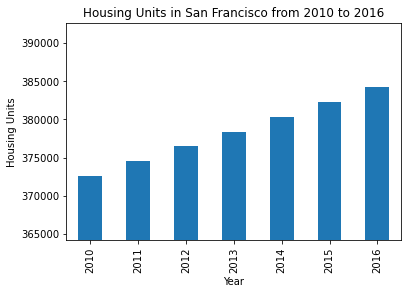

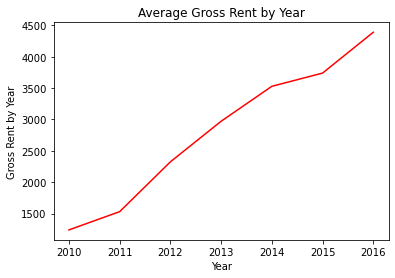

In [59]:
# Create a Title for the Dashboard

# Create a tab layout for the dashboard

row_of_bar_1 = pn.Row(housing_units_per_year(sfo_panel), average_gross_rent(sfo_panel)) 
row_of_bar_2 = pn.Row(average_price_by_neighborhood(sfo_panel))

# average_price_by_neighborhood(sfo_panel)

plots_as_column = pn.Column(
    "# All Plots", row_of_bar_1
)




# Create the dashboard
# YOUR CODE HERE!
tabs_dashboard = pn.Tabs(
    ("Column Plots", plots_as_column),
    ("Interactive Plots", row_of_bar_2),
)
tabs_dashboard



## Serve the Panel Dashboard

In [ ]:
# Serve the# dashboard
# YOUR CODE HERE!

# Debugging

Note: Some of the Plotly express plots may not render in the notebook through the panel functions.

However, you can test each plot by uncommenting the following code

<AxesSubplot:title={'center':'Housing Units in San Francisco from 2010 to 2016'}, xlabel='Year', ylabel='Housing Units'>

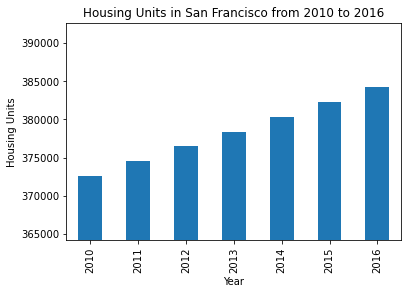

In [27]:
# housing_units_per_year()
def housing_units_per_year(sfo_panel):
    """Housing Units Per Year."""
    
    # YOUR CODE HERE!
    housing_units_mean = sfo_panel['housing_units'].groupby('year').mean()
    min_h = housing_units_mean.min()
    max_h = housing_units_mean.max()
    std_h = housing_units_mean.std()
    
    figure1 = plt.figure()
    plot_housing_units = housing_units_mean.plot.bar()

    plot_housing_units.set_xlabel('Year')
    plot_housing_units.set_ylabel('Housing Units')
    plot_housing_units.set_title('Housing Units in San Francisco from 2010 to 2016')
    plot_housing_units.set_ylim( min_h - 2*std_h , max_h + 2*std_h)
  

    return plot_housing_units
 
housing_units_per_year(sfo_panel)
    

<AxesSubplot:title={'center':'Average Gross Rent by Year'}, xlabel='Year', ylabel='Gross Rent by Year'>

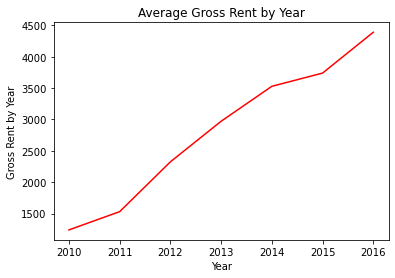

In [26]:
# average_gross_rent()

def average_gross_rent(sfo_panel):
    """Average Gross Rent in San Francisco Per Year."""
    
    # YOUR CODE HERE!
    avg_sale_price = sfo_panel[['gross_rent']].groupby('year').mean()
    avg_sale_price

    figure3 = plt.figure()
    plot_gross_rent  = avg_sale_price['gross_rent'].plot(color='red')

    plot_gross_rent.set_xlabel('Year')
    plot_gross_rent.set_ylabel('Gross Rent by Year')
    plot_gross_rent.set_title('Average Gross Rent by Year')
   
    return plot_gross_rent

average_gross_rent(sfo_panel)

In [ ]:
# average_sales_price()

In [34]:
# average_price_by_neighborhood()
def average_price_by_neighborhood(sfo_panel):
    """Average Prices by Neighborhood."""
    
    # YOUR CODE HERE!
    sales_price_by_neighborhood = sfo_panel.groupby(['year','neighborhood']).mean()
    hplot_sales_price_by_neighborhood = sales_price_by_neighborhood.hvplot(x='year', y='sale_price_sqr_foot', rot=90, legend='bottom_right', width=400, groupby='neighborhood', hover_cols='all')
    return hplot_sales_price_by_neighborhood

average_price_by_neighborhood(sfo_panel)



:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot,neighborhood,housing_units,gross_rent)

In [ ]:
# top_most_expensive_neighborhoods()

In [ ]:
# most_expensive_neighborhoods_rent_sales()

In [ ]:
# neighborhood_map().show()

In [ ]:
# parallel_categories()

In [ ]:
# parallel_coordinates()

In [ ]:
# sunburst()